Let’s pretend that we are designing a veterinary trial for a vaccine against Hepatitis E for pigs. The
probability to become infected following an exposure is pc = 0.5 for untreated pigs. The developer of the
vaccine believes that this probability is reduced to pv = 0.1 following vaccination. The control and treatment
arms have the same number of pigs, N, and the statistical significance is evaluated via a permutation test.
How should we choose N to ensure that we have approximately 90% chance of seeing the lower probability
of infection after the vaccination that is significant at α= 0.05 level?<br><br>
This problem can be solved by a large number of methods. I suggest that you pursue a computational
approach. That is implement functions that simulate the outcomes in control and treatment arms; implement
a function that performs a permutation test; and determine the probability of a statistically significant
difference at α= 0.05 level for a few values of N. Based on that plot, determine a suitable value of N that the
problem asks for. Then perform simulations at this N and confirm that there is indeed about 90% chance
that the trial passes the statistical test.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#first simulate the infection using random and a function, outputs true or false
def simulate_infection(n, prob):
    return np.random.rand(n) < prob

In [26]:
#next, define a function that performs a permutation test
def permutation_test(control_outcomes, treatment_outcomes, n_permutations = 1000):
    """performs a permutation test to assess the significance of difference in infection rates"""
    #first, find the difference between mean infection rates of the two groups (proportions of infected pigs)

    observed_difference = np.mean(control_outcomes) - np.mean(treatment_outcomes)
    
    # By pooling both groups together, we create a dataset that represents the null hypothesis (no difference between groups), 
    # which we’ll use to simulate what differences could occur by random chance.
    combined = np.concatenate([np.array(control_outcomes), np.array(treatment_outcomes)])
    
    #keep track of how many times the permuted difference is as or more extreme than the observed difference
    count = 0
    
    for _ in range(n_permutations):
        np.random.shuffle(combined) #shuffle the combined arrays randomly
        #split the combined into two groups
        perm_control = combined[:len(control_outcomes)] #takes first half
        perm_treatment = combined[len(control_outcomes):] #takes second half
        #calculate difference in infection rates between the two groups
        perm_difference = np.mean(perm_control) - np.mean(perm_treatment)
        
        #check if observed difference is less than or equal to the permutated difference
        if abs(perm_difference) >= abs(observed_difference):
            count += 1 #count of perm diff >= obs diff + 1
    
    #calculate the pvalue using count
    pvalue = count / n_permutations
    return pvalue


In [40]:
#Now, define a function that allows us to find analyze the powers of different Ns to determine what is the smallest N to achieve 90% power with an alpha of 0.05

def analyze_power(pc=0.5, pv=0.1, alpha = 0.05, target_power = 0.9, n_range = range(10, 201, 10), n_simulations = 1000):
    """Estimates the power of detecting a significant difference for different values of N"""
    powers = [] #empty list of powers for later
    powers = []
    
    for n in n_range:
        count = 0 # initialize count of significant tests as 0
        for _ in range(n_simulations):
            control_out = simulate_infection(n, pc)
            treatment_out = simulate_infection(n, pv)
            pvalue = permutation_test(control_out, treatment_out)
            if pvalue < alpha:
                count += 1
        
        power = count / n_simulations
        powers.append(power)
    
    plt.plot(n_range, powers, marker = 'x')
    plt.axhline(y = target_power, color = 'r', linestyle = '--', label = f'Target Power ({target_power})')
    plt.xlabel('Number of pigs (N)')
    plt.ylabel('Power')
    plt.title("Power analysis")
    plt.legend()
    plt.show()

    suitable_n = next((n for n, power in zip(n_range, powers) if power >= target_power), None)

    return(suitable_n, powers)

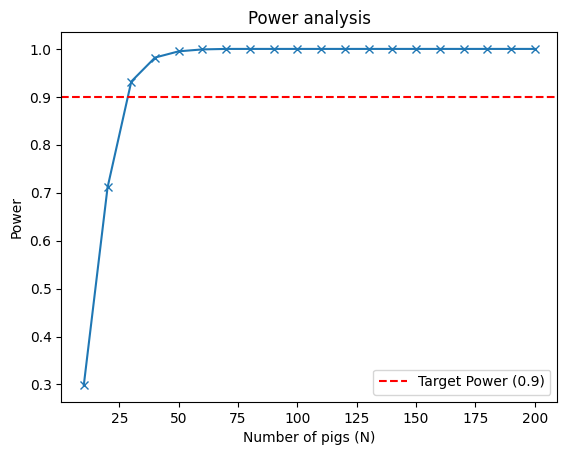

(30, [0.299, 0.711, 0.932, 0.982, 0.995, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])


In [ ]:
#run using default parameters

print(analyze_power())

from this we can see that the fewest number of samples to have a statistical power of 0.9 was 30. This was based off of samples from 10 to 200 in steps of 10 (20 different sample sizes. From here we can narrow down to look at samples sizes from 20 to 40 in steps of 2 to get a more accurate estimate

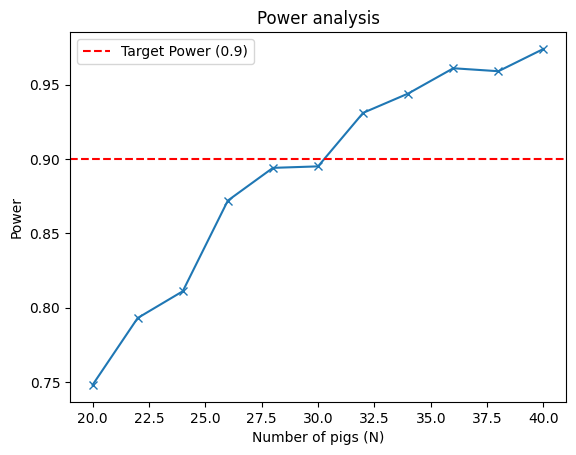

(32, [0.748, 0.793, 0.811, 0.872, 0.894, 0.895, 0.931, 0.944, 0.961, 0.959, 0.974])


In [38]:
pc = 0.5
pv = 0.1
alpha = 0.05
target_power = 0.9
n_range = range(20, 41, 2)

print(analyze_power(pc, pv, alpha, target_power, n_range))

This result came up with 32. Next we can narrow it down even more for sample sizes 25-35 in steps of 1

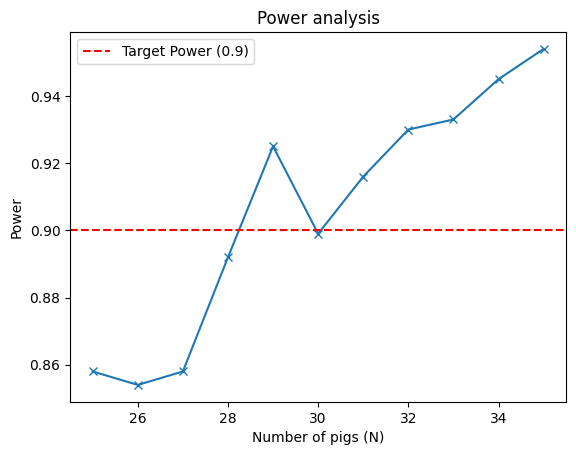

(29, [0.858, 0.854, 0.858, 0.892, 0.925, 0.899, 0.916, 0.93, 0.933, 0.945, 0.954])


In [37]:
pc = 0.5
pv = 0.1
alpha = 0.05
target_power = 0.9
n_range = range(25, 36, 1)

print(analyze_power(pc, pv, alpha, target_power, n_range))

After this test, it seems the smallest N to achieve a power of 0.9 with an alpha of 0.05 is 29